# Multi Linear Regression

In [77]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
X = load_boston().data
Y = load_boston().target
ones = np.ones((X.shape[0],1))

In [3]:
df = pd.DataFrame(X, columns=load_boston().feature_names)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
Y.shape

(506,)

In [7]:
X.shape

(506, 13)

In [8]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [9]:
Y[0]

24.0

In [150]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [10]:
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X = (X - mu) / sigma
X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

## Multivariate Regression

In [11]:
def hypothesis(X,theta):
    y=0.0
    for i in range(X.shape[0]):
        y += X[i]*theta[i]
    return y

m : No. of entries

n : No. of features

$$
J_{\theta}(x) = \frac{1}{m} \sum (h_{\theta}(x_i) - y_i) ^2
$$

In [154]:
def error(X,Y,theta):
    err = 0.0
    m = Y.shape[0]
    for i in range(m):
        h = hypothesis(X[i], theta)
        err += (h - Y[i]) ** 2
    return err / m

In [99]:
def gradient(X,Y,theta):
    grad = np.zeros((theta.shape[0]))
    for i in range(theta.shape[0]):
        for j in range(X.shape[0]):
            h=hypothesis(X[j],theta)
            grad[i]+=(h-Y[j])*X[j][i]
            
    return grad/X.shape[0]

In [100]:
def gradient_descent(X,Y,lr=.1,max_itr=100):
    m,n=X.shape
    theta=np.zeros((n,))
    err=[]
    for i in range(max_itr):
        err.append(error(X,Y,theta))
        theta=theta-lr*gradient(X,Y,theta)
    return err,theta

In [101]:
X=np.hstack((np.ones((X.shape[0],1)),X))

In [103]:
err, theta = gradient_descent(X,Y)

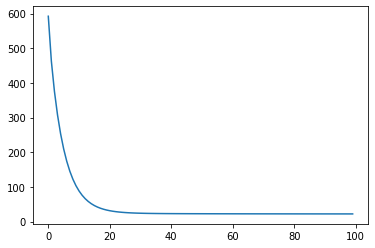

In [104]:
plt.plot(err)

In [105]:
theta

array([22.53220782, -0.78185418,  0.81390376, -0.27302486,  0.74237969,
       -1.58190647,  2.88681934, -0.10320657, -2.74824502,  1.4628725 ,
       -0.88418974, -1.95313341,  0.87190431, -3.64467529])

In [106]:
df=pd.read_csv("Train.csv").values
Y_train=df[:,-1]
X_train=df[:,:-1]

In [107]:
X_train.shape,Y_train.shape

((1600, 5), (1600,))

In [108]:
mu = np.mean(X_train,axis=0)
sigma = np.std(X_train,axis=0)
X_train = (X_train - mu) / sigma

In [109]:
X_train=np.hstack((np.ones((X_train.shape[0],1)),X_train))

In [110]:
err, theta = gradient_descent(X_train, Y_train)

In [111]:
X_test=pd.read_csv("Test.csv").values

In [112]:
X_test=(X_test-mu)/sigma

In [113]:
X_test=np.hstack((np.ones((X_test.shape[0],1)),X_test))

In [114]:
Y_test=[]
for i in range(theta.shape[0]):
    Y_test.append(hypothesis(X_test[i],theta))

In [115]:
Y_test=np.array(Y_test)
Y_test=np.reshape(Y_test,(-1,1))

In [116]:
df=pd.DataFrame(Y_test)

In [63]:
df.to_csv("Sol.csv",index_label=["Id","target"])

## Vectorization

In [14]:
def Hypothesis(X, theta):
    return X.dot(theta)

In [15]:
def Error(X,Y,theta):
    hx = Hypothesis(X, theta)
    return ((hx - Y) ** 2).mean()

## Gradient Descent
$$
\frac{\delta J}{\delta \theta_j} = \frac{1}{m} \Sigma_{i \in m} (h(x^{(i)}) - y^{(i)}) x^{(i)}_j
$$

Vectorized will be 

$$
\frac{\delta J}{\delta \theta} = \frac{1}{m} X^{T} \cdot (h(X) - Y)
$$

m = 2

n = 3

x(1) = [10, 23, 67]

x(2) = [100, 34, 67]

(h(x(1)) - y(1)) ^ 2

(h(x(1)) - y(1)) * x(1, 0) + (h(x(2)) - y(2)) * x(2, 0)
(h(x(1)) - y(1)) * x(1, 1) + (h(x(2)) - y(2)) * x(2, 1)
(h(x(1)) - y(1)) * x(1, 2) + (h(x(2)) - y(2)) * x(2, 2)

X: (m, n) --> (m, n + 1)
x(3) --> [1, 90, 89, 100, 4]
theta --> [t0, t1, t2, t3, t4]
h(theta, x(3)) --> t0 + 90 t1 + 89 t2 + 100 t3 + 4 t4
theta.T.dot(x(3)) (1, n + 1) . (n + 1, 1) --> (1, 1)


X.T dot (h(X) - Y)
(m, n + 1)
(n + 1, m) ((m, 1) - (m, 1))
(n + 1, m) dot (m, 1) --> (n + 1, 1)

In [16]:
def gradient(X, Y, theta):
    m, _ = X.shape
    hx = Hypothesis(X, theta)
    return X.T.dot(hx - Y) / m

In [35]:
def gradient_descent(X, Y, lr=0.1, max_itr=100):
    m, n = X.shape
    err_list = []
    theta = np.zeros((n, 1))
    
    for i in range(max_itr):
        err = Error(X, Y, theta)
        err_list.append(err)
        grad = gradient(X, Y, theta)
        # gradient Descent
        theta = theta - lr * grad
        if i % 100 == 0:
            print(f'Iteration no. {i} and cost is {err}')
    return theta, err_list

In [18]:
X = load_boston().data
Y = load_boston().target

In [19]:
Y.shape

(506,)

In [20]:
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X = (X - mu) / sigma

In [21]:
X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [22]:
X.shape

(506, 13)

In [23]:
X = np.hstack((np.ones((X.shape[0],1)), X))
X

array([[ 1.        , -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 1.        , -0.41344658, -0.48772236, ...,  1.17646583,
         0.44105193, -0.98304761],
       [ 1.        , -0.40776407, -0.48772236, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [ 1.        , -0.41500016, -0.48772236, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [24]:
X.shape

(506, 14)

In [168]:
# bad code
# Y.reshape(-1, 1)

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [25]:
Y.shape

(506,)

In [170]:
time.time()

1609248767.8837235

In [37]:
start = time.time()
theta, err = gradient_descent(X, Y.reshape(-1,1), lr=.3, max_itr=10_000)
end = time.time()
print(end - start)

Iteration no. 0 and cost is 592.1469169960474
Iteration no. 100 and cost is 21.91035103872821
Iteration no. 200 and cost is 21.895161225566113
Iteration no. 300 and cost is 21.894838223761802
Iteration no. 400 and cost is 21.894831331983305
Iteration no. 500 and cost is 21.89483118493514
Iteration no. 600 and cost is 21.89483118179761
Iteration no. 700 and cost is 21.894831181730662
Iteration no. 800 and cost is 21.894831181729238
Iteration no. 900 and cost is 21.894831181729206
Iteration no. 1000 and cost is 21.894831181729206
Iteration no. 1100 and cost is 21.894831181729202
Iteration no. 1200 and cost is 21.894831181729206
Iteration no. 1300 and cost is 21.894831181729206
Iteration no. 1400 and cost is 21.894831181729206
Iteration no. 1500 and cost is 21.894831181729202
Iteration no. 1600 and cost is 21.894831181729206
Iteration no. 1700 and cost is 21.894831181729206
Iteration no. 1800 and cost is 21.894831181729206
Iteration no. 1900 and cost is 21.894831181729206
Iteration no. 20

In [38]:
theta

array([[ 2.25328063e+01],
       [-9.28146064e-01],
       [ 1.08156863e+00],
       [ 1.40899997e-01],
       [ 6.81739725e-01],
       [-2.05671827e+00],
       [ 2.67423017e+00],
       [ 1.94660717e-02],
       [-3.10404426e+00],
       [ 2.66221764e+00],
       [-2.07678168e+00],
       [-2.06060666e+00],
       [ 8.49268418e-01],
       [-3.74362713e+00]])

In [39]:
theta.shape

(14, 1)

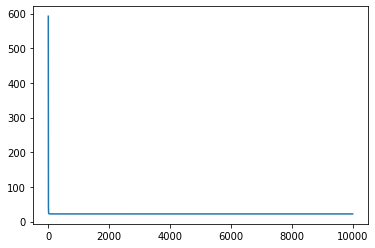

In [40]:
plt.plot(err)

In [41]:
theta.shape

(14, 1)

In [42]:
theta

array([[ 2.25328063e+01],
       [-9.28146064e-01],
       [ 1.08156863e+00],
       [ 1.40899997e-01],
       [ 6.81739725e-01],
       [-2.05671827e+00],
       [ 2.67423017e+00],
       [ 1.94660717e-02],
       [-3.10404426e+00],
       [ 2.66221764e+00],
       [-2.07678168e+00],
       [-2.06060666e+00],
       [ 8.49268418e-01],
       [-3.74362713e+00]])

In [43]:
def evaluate(Y_actual, Y_pred):
    num = ((Y_actual - Y_pred) ** 2).sum()
    denom = ((Y_actual - Y_actual.mean()) ** 2).sum()
    return (1 - (num / denom)) * 100

In [44]:
Y_pred = X.dot(theta)
Y_pred.shape

(506, 1)

In [45]:
Y = Y.reshape((506, 1))
Y.shape

(506, 1)

In [46]:
evaluate(Y, Y_pred)

74.06426641094093

## Polynomial Regression

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
X = pd.read_csv("weightedX.csv").values
Y = pd.read_csv("weightedY.csv").values

In [49]:
X.shape

(99, 1)

In [54]:
X

array([[ 2.3348e+00],
       [ 1.3264e-01],
       [ 2.3470e+00],
       [ 6.7389e+00],
       [ 3.7089e+00],
       [ 1.1853e+01],
       [-1.8708e+00],
       [ 4.5025e+00],
       [ 3.2798e+00],
       [ 1.7573e+00],
       [ 3.3784e+00],
       [ 1.1470e+01],
       [ 9.0595e+00],
       [-2.8174e+00],
       [ 9.3184e+00],
       [ 8.4211e+00],
       [ 8.6215e-01],
       [ 7.5544e+00],
       [-3.9883e+00],
       [ 4.4970e+00],
       [ 8.3062e+00],
       [-2.6070e+00],
       [ 4.4801e+00],
       [-1.5074e+00],
       [ 9.6284e+00],
       [-6.2500e-01],
       [-2.8016e-01],
       [-1.0117e-01],
       [ 7.4912e+00],
       [ 3.4492e+00],
       [-4.0706e+00],
       [-1.7481e+00],
       [ 7.3176e+00],
       [ 1.1552e+01],
       [ 6.9763e+00],
       [ 8.6259e+00],
       [-1.4938e+00],
       [ 8.1353e+00],
       [ 9.8359e+00],
       [ 8.7256e+00],
       [ 7.8627e+00],
       [ 1.0378e+01],
       [ 2.1570e+00],
       [ 6.1928e+00],
       [-4.9780e+00],
       [ 1

In [50]:
Y.shape

(99, 1)

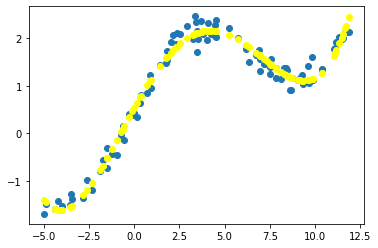

In [91]:
plt.scatter(X,Y)
# plt.plot(X, lr_model.predict(X), color="red")
# plt.scatter(X, lr2_model.predict(x), color="orange")
# plt.scatter(X, lr3_model.predict(x3), color="pink")
plt.scatter(X, lr4_model.predict(x4), color="yellow")
# plt.scatter(X, lr5_model.predict(x5), color="pink")

In [52]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X, Y)

LinearRegression()

In [55]:
x = np.hstack((X, X**2))

In [56]:
x

array([[ 2.33480000e+00,  5.45129104e+00],
       [ 1.32640000e-01,  1.75933696e-02],
       [ 2.34700000e+00,  5.50840900e+00],
       [ 6.73890000e+00,  4.54127732e+01],
       [ 3.70890000e+00,  1.37559392e+01],
       [ 1.18530000e+01,  1.40493609e+02],
       [-1.87080000e+00,  3.49989264e+00],
       [ 4.50250000e+00,  2.02725063e+01],
       [ 3.27980000e+00,  1.07570880e+01],
       [ 1.75730000e+00,  3.08810329e+00],
       [ 3.37840000e+00,  1.14135866e+01],
       [ 1.14700000e+01,  1.31560900e+02],
       [ 9.05950000e+00,  8.20745402e+01],
       [-2.81740000e+00,  7.93774276e+00],
       [ 9.31840000e+00,  8.68325786e+01],
       [ 8.42110000e+00,  7.09149252e+01],
       [ 8.62150000e-01,  7.43302622e-01],
       [ 7.55440000e+00,  5.70689594e+01],
       [-3.98830000e+00,  1.59065369e+01],
       [ 4.49700000e+00,  2.02230090e+01],
       [ 8.30620000e+00,  6.89929584e+01],
       [-2.60700000e+00,  6.79644900e+00],
       [ 4.48010000e+00,  2.00712960e+01],
       [-1.

In [216]:
x.shape

(99, 2)

In [57]:
lr2_model = LinearRegression()
lr2_model.fit(x, Y)

LinearRegression()

In [58]:
lr_model.score(X,Y)

0.5141377991406518

In [59]:
lr2_model.score(x,Y)

0.8152095679916156

In [61]:
x3 = np.hstack((x, X**3))

In [62]:
x3

array([[ 2.33480000e+00,  5.45129104e+00,  1.27276743e+01],
       [ 1.32640000e-01,  1.75933696e-02,  2.33358454e-03],
       [ 2.34700000e+00,  5.50840900e+00,  1.29282359e+01],
       [ 6.73890000e+00,  4.54127732e+01,  3.06032137e+02],
       [ 3.70890000e+00,  1.37559392e+01,  5.10194029e+01],
       [ 1.18530000e+01,  1.40493609e+02,  1.66527075e+03],
       [-1.87080000e+00,  3.49989264e+00, -6.54759915e+00],
       [ 4.50250000e+00,  2.02725063e+01,  9.12769594e+01],
       [ 3.27980000e+00,  1.07570880e+01,  3.52810974e+01],
       [ 1.75730000e+00,  3.08810329e+00,  5.42672391e+00],
       [ 3.37840000e+00,  1.14135866e+01,  3.85596608e+01],
       [ 1.14700000e+01,  1.31560900e+02,  1.50900352e+03],
       [ 9.05950000e+00,  8.20745402e+01,  7.43554297e+02],
       [-2.81740000e+00,  7.93774276e+00, -2.23637965e+01],
       [ 9.31840000e+00,  8.68325786e+01,  8.09140700e+02],
       [ 8.42110000e+00,  7.09149252e+01,  5.97181677e+02],
       [ 8.62150000e-01,  7.43302622e-01

In [63]:
x3.shape

(99, 3)

In [64]:
lr3_model = LinearRegression()
lr3_model.fit(x3, Y)

LinearRegression()

In [65]:
lr3_model.score(x3, Y)

0.8405207681165574

In [67]:
x4 = np.hstack((x3, X**4))
x4.shape

(99, 4)

In [68]:
lr4_model = LinearRegression()
lr4_model.fit(x4, Y)

LinearRegression()

In [69]:
lr4_model.score(x4, Y)

0.9787712201032478

In [71]:
x5 = np.hstack((x4, X ** 5))
x5.shape

(99, 5)

In [72]:
lr5_model = LinearRegression()
lr5_model.fit(x5, Y)

LinearRegression()

In [73]:
lr5_model.score(x5, Y)

0.978956548140068